In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

In [11]:
im = cv2.imread('../test-images/a-48.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [16]:
np.array(gray.shape, dtype=np.uint64)/2

array([1100.,  850.])

In [64]:
10*np.random.randn(h,w)

array([[ 15.33393514,   0.52154179,   9.81075934, ...,   8.14354044,
          0.99627002,  14.06590648],
       [ -9.82414246, -10.39769482,  16.59916285, ...,   4.89908582,
          8.56696043,  15.59180408],
       [ 20.24900225,   8.49794816,   8.67398119, ...,  -4.18406122,
          3.02862022,   7.99889958],
       ...,
       [ -6.40095674,  -1.28922085,  -1.64743624, ...,   4.94276114,
         -0.63258084,  -4.66968262],
       [ -0.43351516,  -8.20936758,   3.01332815, ..., -19.50285485,
         -5.69233606,   3.86814245],
       [  2.73526163, -22.74250475,  -8.00455075, ..., -33.93965644,
          0.27676633,  -0.04109022]])

In [91]:
h,w = gray.shape
M = cv2.getRotationMatrix2D((w/2, h/2), -0.5, 1.2)
shifted = cv2.warpAffine(gray, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
noisy = np.clip(shifted.astype(np.uint64) + 5*np.random.randn(h,w), a_min=0, a_max=255).astype(np.uint8)

In [95]:
def wreck_it(gray, theta=0, scale=1.1, sigma=5):
    h,w = gray.shape
    M = cv2.getRotationMatrix2D((w/2, h/2), theta, scale)
    shifted = cv2.warpAffine(gray, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
    noisy = np.clip(shifted.astype(np.uint64) + sigma*np.random.randn(h,w), a_min=0, a_max=255).astype(np.uint8)
    return noisy

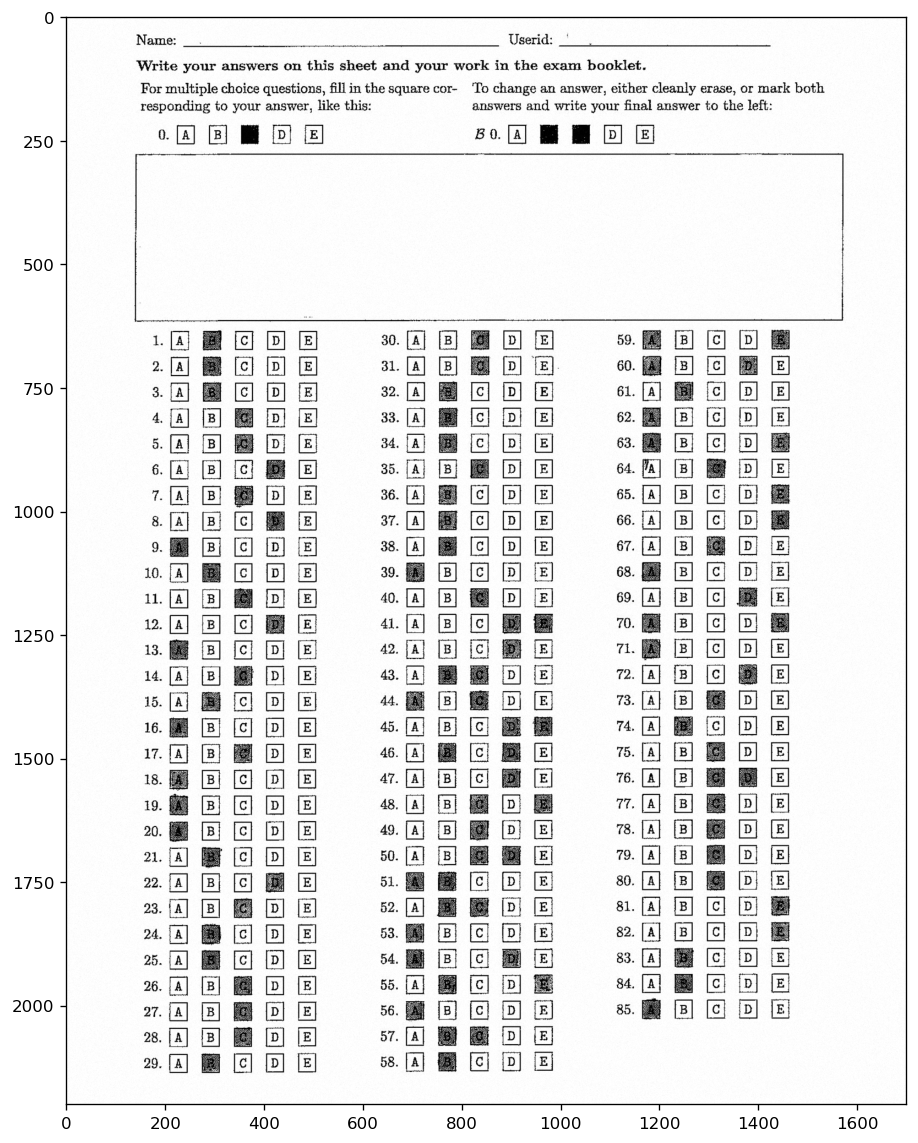

In [96]:
plt.figure(figsize=(10,12))
plt.imshow(wreck_it(gray), cmap='gray')